In [2]:
import pandas as pd

In [8]:
titanic_df = pd.read_csv(r"C:/Users/JG/abangers/titanic_train.csv")

In [9]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [32]:
print('titanic 변수 type : ', type(titanic_df))
print(titanic_df.shape)
titanic_df.info() #str type은 object로 표현

titanic 변수 type :  <class 'pandas.core.frame.DataFrame'>
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic_df.describe() #숫자형 column만 나옴, 문자형은 출력x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수', titanic_df.isnull().sum().sum())
#.sum()을 하나만 하면 모든 열별로 나옴 .sum()을 하나 더 붙이면 모든열기준 null값있는지 확인

데이터 세트 Null 값 갯수 0


In [41]:
print('Sex값 분포 :\n)', titanic_df['Sex'].value_counts())
print('\n Cabin값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())
# ==> data를 쓸 수 없다.

Sex값 분포 :
) male      577
female    314
Name: Sex, dtype: int64

 Cabin값 분포 : 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
E101             3
              ... 
C87              1
C7               1
E68              1
D10 D12          1
B82 B84          1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [43]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [44]:
titanic_pclass = titanic_df['Pclass']
type(titanic_pclass)

pandas.core.series.Series

In [45]:
value_counts = titanic_df['Pclass'].value_counts()
value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic_df = pd.read_csv(r"C:/Users/JG/abangers/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.groupby(['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

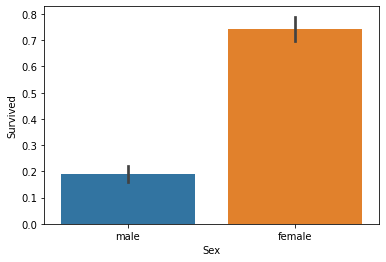

In [6]:
print(titanic_df.groupby(['Sex', 'Survived'])['Survived'].count())
sns.barplot(x='Sex', y='Survived', data=titanic_df)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

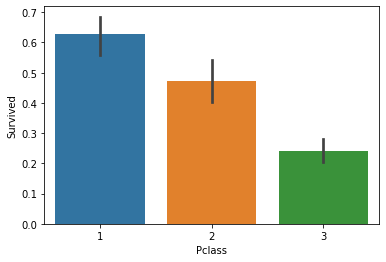

In [7]:
print(titanic_df.groupby(["Pclass", 'Survived'])['Survived'].count())
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

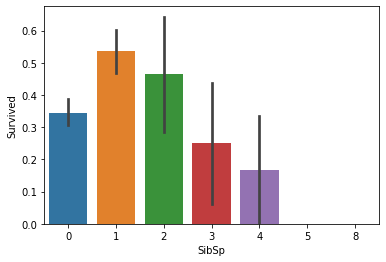

In [8]:
print(titanic_df.groupby(["SibSp", 'Survived'])['Survived'].count())
sns.barplot(x='SibSp', y='Survived', data=titanic_df)

In [9]:
def changeAge(x):
    if 0 <= x <= 5:
        return 'baby'
    elif 6 <= x <= 12:
        return 'child'
    elif 13 <= x <= 18:
        return 'teenager'
    elif 19 <= x <= 25:
        return 'student'
    elif 26 <= x <= 35:
        return 'young adult'
    elif 36 <= x <= 60:
        return 'adult'
    elif 61 <= x:
        return 'elderly'
    else:
        return 'Unknown'
    

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

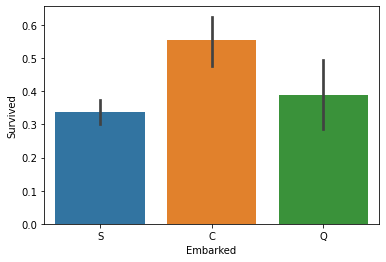

In [11]:
print(titanic_df.groupby(["Embarked", 'Survived'])['Survived'].count())
sns.barplot(x='Embarked', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

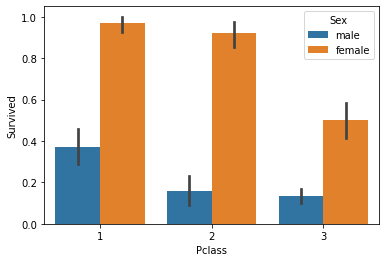

In [12]:
#hue를 이용하여 더 상세한 정보 추가 가능
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [13]:
titanic_df['Age_range'] = titanic_df["Age"].apply(changeAge)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adult


<AxesSubplot:xlabel='Age_range', ylabel='Survived'>

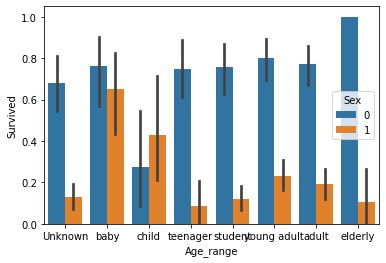

In [18]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df['Fare'].fillna(0, inplace=True)
group_names = ['Unknown', 'baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elderly']
sns.barplot(x='Age_range', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()
encoder.fit(titanic_df['Age_range']) 
labels = encoder.transform(titanic_df['Age_range'])

labels = labels.reshape(-1, 1) 


oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels.toarray().shape)

(891, 8)


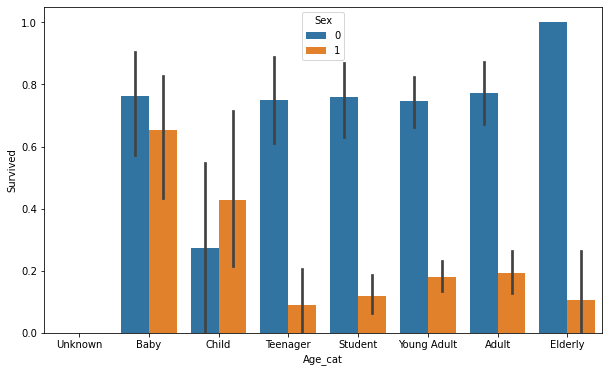

In [20]:
def get_category(age):
    cat = ""
    if age<= -1: cat='Unknown'
    elif age<= 5: cat='Baby'
    elif age<= 12: cat='Child'
    elif age<= 18: cat='Teenager'   
    elif age<= 25: cat='Student'   
    elif age<= 35: cat='Young Adult'
    elif age<= 60: cat='Adult'
    else : cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

titanic_df.drop('Age_cat', axis=1, inplace=True)

In [21]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3,young adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3,young adult


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()
encoder.fit(titanic_df['Age_range']) 
labels = encoder.transform(titanic_df['Age_range'])

labels = labels.reshape(-1, 1) 


oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels.toarray())


[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [43]:
def fillna(df):#Null 처리
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):#머신러닝알고리즘에 불필요한 속성 제거
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [44]:
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv(r"C:/Users/JG/abangers/titanic_train.csv")
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)

x_titanic_df = transform_features(x_titanic_df)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11) 


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


C:\Users\JG\anaconda3\envs\abangues\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits = 5)
dt_accuracy = []
rf_accuracy = []
lr_accuracy = []
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()


for train_index, test_index in kfold.split(x_titanic_df):

    x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index] 
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    dt_clf.fit(x_train, y_train)
    dt_pred = dt_clf.predict(x_test)

    rf_clf.fit(x_train, y_train)
    rf_pred = rf_clf.predict(x_test)

    lr_clf.fit(x_train, y_train)
    lr_pred = lr_clf.predict(x_test)

    
    accuracy_1 = np.round(accuracy_score(y_test, dt_pred), 4)
    accuracy_2 = np.round(accuracy_score(y_test, rf_pred), 4)
    accuracy_3 = np.round(accuracy_score(y_test, lr_pred), 4)

    dt_accuracy.append(accuracy_1)
    rf_accuracy.append(accuracy_2)
    lr_accuracy.append(accuracy_3)
    

print('\n## dt평균 검증 정확도 : ', np.mean(dt_accuracy))
print('\n## rf평균 검증 정확도 : ', np.mean(rf_accuracy))
print('\n## lr평균 검증 정확도 : ', np.mean(lr_accuracy))

C:\Users\JG\anaconda3\envs\abangues\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JG\anaconda3\envs\abangues\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m


## dt평균 검증 정확도 :  0.7823

## rf평균 검증 정확도 :  0.81486

## lr평균 검증 정확도 :  0.78786


C:\Users\JG\anaconda3\envs\abangues\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
from sklearn.model_selection import KFold
import numpy as np


def KFold_func(a,b,c):

    kfold = KFold(n_splits = 5)
    dt_accuracy = []
    rf_accuracy = []
    lr_accuracy = []
    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression()
    
    for train_index, test_index in kfold.split(x_titanic_df):

        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index] 
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        a.fit(x_train, y_train)
        dt_pred = a.predict(x_test)

        b.fit(x_train, y_train)
        rf_pred = b.predict(x_test)

        c.fit(x_train, y_train)
        lr_pred = c.predict(x_test)


        accuracy_1 = np.round(accuracy_score(y_test, dt_pred), 4)
        accuracy_2 = np.round(accuracy_score(y_test, rf_pred), 4)
        accuracy_3 = np.round(accuracy_score(y_test, lr_pred), 4)

        dt_accuracy.append(accuracy_1)
        rf_accuracy.append(accuracy_2)
        lr_accuracy.append(accuracy_3)


    print('\n## dt평균 검증 정확도 : ', np.mean(dt_accuracy))
    print('\n## rf평균 검증 정확도 : ', np.mean(rf_accuracy))
    print('\n## lr평균 검증 정확도 : ', np.mean(lr_accuracy))
    
KFold_func(dt_clf, rf_clf, lr_clf)

C:\Users\JG\anaconda3\envs\abangues\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JG\anaconda3\envs\abangues\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m


## dt평균 검증 정확도 :  0.7823

## rf평균 검증 정확도 :  0.81486

## lr평균 검증 정확도 :  0.78786


C:\Users\JG\anaconda3\envs\abangues\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
    #fold set가 5개의 KFold객체를 생성, fold 수만큼 예측결과 저장을 위한 list객체 생성
    kfold = KFold(n_splits=folds)
    scores=[]
    
    #KFold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        
        #x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index] ##기존 iris를 가지고 할때 features는 array였음
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index] ##지금은 dataframe이므로 .values를 해주어야함
    
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        
        print('교차 검증{0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
    #5개 fold에서의 평균정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증0 정확도 : 0.7542
교차 검증1 정확도 : 0.7809
교차 검증2 정확도 : 0.7865
교차 검증3 정확도 : 0.7697
교차 검증4 정확도 : 0.8202
평균 정확도 : 0.7823


In [53]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate

dt_clf = DecisionTreeClassifier(random_state=11)

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, scoring='accuracy', cv=5)

print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


교차 검증별 정확도: [0.743  0.7753 0.7921 0.7865 0.8427]
평균 검증 정확도: 0.7879


In [58]:
# 교차검증을 cross_val_score() API를 이용해 수행
from sklearn.model_selection import cross_val_score
# cross_val_score는 내부적으로 교차검증을 할때 KFold or stratifiedKFOld를 결정하여 리턴
# 분류일 경우 stratifiedKFold로 리턴
# 회귀일 경우 KFold로 리턴
scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count , accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [65]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파리미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_ #GridSearchCV를 하여 찾아낸 최적의 하이퍼 파라미터 값

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가수행.
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파리미터 :  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.8121
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8652


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파리미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가수행.
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
precision = precision_score(y_test, dpredictions)
recall = recall_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
print('테스트 세트에서의 DecisionTreeClassifier 정밀도 : {0:.4f}'.format(precision))
print('테스트 세트에서의 DecisionTreeClassifier 재현율 : {0:.4f}'.format(recall))

GridSearchCV 최적 하이퍼 파리미터 :  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.8121
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8652
테스트 세트에서의 DecisionTreeClassifier 정밀도 : 0.8197
테스트 세트에서의 DecisionTreeClassifier 재현율 : 0.7937


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
dt_clf = DecisionTreeClassifier(random_state=11)
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
#위 코드에서 생성된 tree.dot파일을 Graphviz로 읽어서 Jupyter Lab상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

NameError: name 'iris_data' is not defined